In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Worst BA experience. I was s...
1,✅ Trip Verified | My daughter and I were deni...
2,✅ Trip Verified | Despite boarding being the u...
3,"Not Verified | Flight cancelled, no crew! 9th..."
4,"Not Verified | The worst service ever, my bag..."


In [ ]:
df

,reviews
0,✅ Trip Verified | Worst BA experience. I was s...
1,✅ Trip Verified | My daughter and I were deni...
2,✅ Trip Verified | Despite boarding being the u...
3,"Not Verified | Flight cancelled, no crew! 9th..."
4,"Not Verified | The worst service ever, my bag..."
...,...
995,✅ Trip Verified | Basel to San Fransisco via ...
996,✅ Trip Verified | London to Lyon. The flight ...
997,✅ Trip Verified | London to Boston. I was sea...
998,✅ Trip Verified | Stockholm to London. Standar...


In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [ ]:
df

,reviews
0,Worst BA experience. I was supposed to fly ou...
1,My daughter and I were denied boarding on ou...
2,Despite boarding being the usual free for all...
3,"Flight cancelled, no crew! 9th September 202..."
4,"The worst service ever, my baggage did not a..."
...,...
995,Basel to San Fransisco via Heathrow. I'm con...
996,London to Lyon. The flight has 1h 30 delay f...
997,London to Boston. I was seated next to a cus...
998,Stockholm to London. Standard configuration o...


In [ ]:
import re
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Worst BA experience. I was supposed to fly ou...,Worst BA experience I was supposed to fly out...
1,My daughter and I were denied boarding on ou...,My daughter and I were denied boarding on our...
2,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...
3,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not pea...
4,"The worst service ever, my baggage did not a...",The worst service ever my baggage did not arr...


In [ ]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Worst BA experience. I was supposed to fly ou...,Worst BA experience I was supposed to fly out...,"[(Worst, n), (BA, n), (experience, n), (suppos..."
1,My daughter and I were denied boarding on ou...,My daughter and I were denied boarding on our...,"[(daughter, n), (denied, v), (boarding, v), (b..."
2,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...,"[(Despite, None), (boarding, v), (usual, a), (..."
3,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not pea...,"[(Flight, n), (cancelled, v), (crew, n), (th, ..."
4,"The worst service ever, my baggage did not a...",The worst service ever my baggage did not arr...,"[(worst, a), (service, n), (ever, r), (baggage..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Worst BA experience. I was supposed to fly ou...,Worst BA experience I was supposed to fly out...,"[(Worst, n), (BA, n), (experience, n), (suppos...",Worst BA experience suppose fly Italy Septem...
1,My daughter and I were denied boarding on ou...,My daughter and I were denied boarding on our...,"[(daughter, n), (denied, v), (boarding, v), (b...",daughter deny board business class flight Ma...
2,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...,"[(Despite, None), (boarding, v), (usual, a), (...",Despite board usual free LHR group call boar...
3,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not pea...,"[(Flight, n), (cancelled, v), (crew, n), (th, ...",Flight cancel crew th September peak holiday...
4,"The worst service ever, my baggage did not a...",The worst service ever my baggage did not arr...,"[(worst, a), (service, n), (ever, r), (baggage...",bad service ever baggage arrive time flight ...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Worst BA experience. I was supposed to fly ou...,Worst BA experience suppose fly Italy Septem...
1,My daughter and I were denied boarding on ou...,daughter deny board business class flight Ma...
2,Despite boarding being the usual free for all...,Despite board usual free LHR group call boar...
3,"Flight cancelled, no crew! 9th September 202...",Flight cancel crew th September peak holiday...
4,"The worst service ever, my baggage did not a...",bad service ever baggage arrive time flight ...
...,...,...
995,Basel to San Fransisco via Heathrow. I'm con...,Basel San Fransisco via Heathrow convince qu...
996,London to Lyon. The flight has 1h 30 delay f...,London Lyon flight h delay flight duration G...
997,London to Boston. I was seated next to a cus...,London Boston seat next customer need extra ...
998,Stockholm to London. Standard configuration o...,Stockholm London Standard configuration shor...


In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Worst BA experience. I was supposed to fly ou...,Worst BA experience I was supposed to fly out...,"[(Worst, n), (BA, n), (experience, n), (suppos...",Worst BA experience suppose fly Italy Septem...,-0.0516,Negative
1,My daughter and I were denied boarding on ou...,My daughter and I were denied boarding on our...,"[(daughter, n), (denied, v), (boarding, v), (b...",daughter deny board business class flight Ma...,-0.9436,Negative
2,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...,"[(Despite, None), (boarding, v), (usual, a), (...",Despite board usual free LHR group call boar...,0.9627,Positive
3,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not pea...,"[(Flight, n), (cancelled, v), (crew, n), (th, ...",Flight cancel crew th September peak holiday...,-0.8834,Negative
4,"The worst service ever, my baggage did not a...",The worst service ever my baggage did not arr...,"[(worst, a), (service, n), (ever, r), (baggage...",bad service ever baggage arrive time flight ...,-0.8519,Negative


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    490
Negative    405
Neutral     105
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7ce9a12a9960>,
 [Text(0.03455180204558485, 1.0994572174374968, 'Positive'),
  Text(-0.3888222626454037, -1.0289884586676903, 'Negative'),
  Text(1.2772152593917465, -0.43728844162277347, 'Neutral')],
 [Text(0.018846437479409915, 0.5997039367840891, '49.0%'),
  Text(-0.21208487053385655, -0.5612664320005583, '40.5%'),
  Text(0.8041725707281367, -0.27532975954026473, '10.5%')])

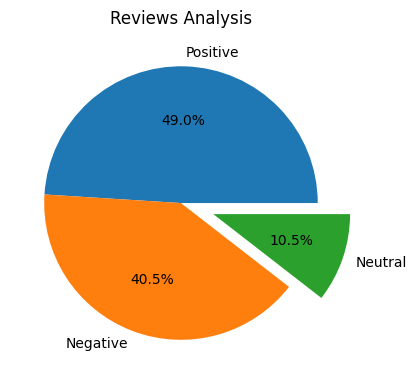

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100
reviews = []
for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")
df = pd.DataFrame()
df["reviews"] = reviews
df.head()
df.reviews= df.reviews.str.split('|',expand=True)[1]
import re
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist
df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()
df[['reviews','Lemma']]
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()
vader_counts = df['Analysis'].value_counts()
vader_counts
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
df.to_csv("BA_reviews.csv")
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df.Lemma)